In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).



In [2]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) # zp
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) # ks

b1 = ((x * y).mean() - x.mean() * y.mean()) / ((x ** 2).mean() - (x.mean() ** 2))
b0 = y.mean() - b1 * x.mean()

b0, b1, 

(444.1773573243596, 2.620538882402765)

In [3]:
mse = np.sum(((b0 + b1 * x) - y) ** 2 / 10)
mse #  для сравнения со значением градиентного спуска с интерсептером

6470.414201176659

С интерсептером

In [4]:
X = np.hstack([np.ones((len(x),1)), x.reshape(-1, 1)])
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
B

array([444.17735732,   2.62053888])

Без интерсептора

In [5]:
X = x.reshape(-1, 1)
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
b1 = B[0]
b1


5.889820420132688

In [6]:
mse = np.sum(((b1 * x) - y) ** 2 / 10)
mse #  для сравнения со значением градиентного спуска без интерсептера

56516.85841571941

In [7]:
y_pred = b0 + b1 * x  #оцененые значения
y_pred

array([ 650.32107203,  709.21927623, 1563.24323715, 1622.14144135,
        679.77017413,  856.46478673,  762.22766001, 1327.65042034,
       1150.95580774, 1092.05760354])

In [8]:

model = LinearRegression() # расчет с моделью
x = x.reshape(-1, 1)
model.fit(x, y)
r_sq = model.score(x, y) # R^2 = 0.788

const = model.intercept_
beta = model.coef_[0]
const, beta



(444.1773573243595, 2.6205388824027662)

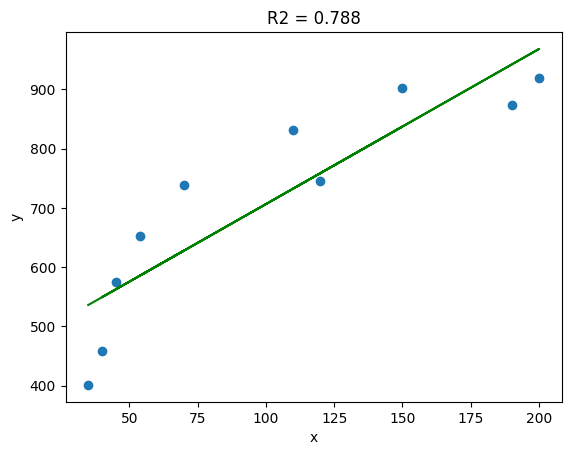

In [9]:
plt.scatter(x, y)
plt.plot(x, beta * x + const, 'g')
plt.title(f'R2 = {round(r_sq, 3)}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

[[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
  627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]]
[[-134.89621821   11.89839297  -68.07974498  -49.2851338   -89.99891262
   111.38492091   67.31354303   64.74181032  -12.64202321   99.56336561]]


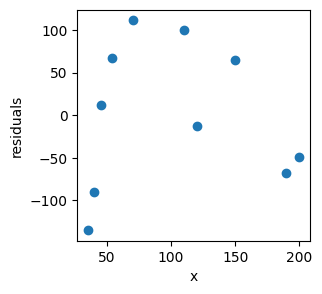

ShapiroResult(statistic=0.9479533433914185, pvalue=0.6443524360656738)

In [10]:
y_hat = beta * x + const # ищем предсказуемые y
y_hat = y_hat.reshape(1, -1) # решейп в линейный массив(обратный)
print(y_hat) # оцененые значения
resid = y - y_hat #разница исходных и предсказанных(остатки)
print(resid)

plt.figure(figsize=(3, 3))
plt.scatter(x, resid) # строим график и проверяем что зависимости у остатков нет(случайные)
plt.xlabel('x')
plt.ylabel('residuals')
plt.show()

st.shapiro(resid) #тест Шапиро на нормальное распределение pvalue=0.64435 > alpha -> H0 распределение нормальное

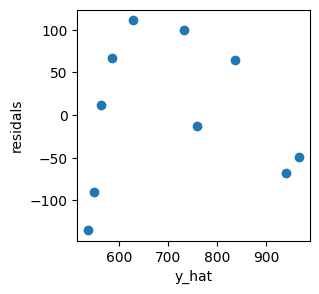

In [11]:
# гомоскедастичность

plt.figure(figsize=(3, 3))
plt.scatter(y_hat, resid)  # график остатков относительно оцененых(предсказанных данных) -> постоянство дисперсии наблюдается
plt.xlabel('y_hat')
plt.ylabel('residals')
plt.show()

In [17]:
import statsmodels.api as sm # листинг модели
x = sm.add_constant(x) # строим модель с константой, добавляет столбец едениц, говорим что строим модель с В0
model = sm.OLS(y, x) # OLS метод наименьших квадратов, метод линейной регрессии
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           0.000611
Time:                        12:00:26   Log-Likelihood:                -58.064
No. Observations:                  10   AIC:                             120.1
Df Residuals:                       8   BIC:                             120.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.1774     56.466      7.866      0.0

/Users/maxim/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

y_pred = B1 * x

In [12]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) # zp
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) # ks



In [13]:
def mse_(B1, y = y, x = x, n = 10): # определяем СКО 
    return np.sum((B1 * x - y)**2) / n

In [14]:
alpha = 1e-6 # скорость обучения
B1 = 0.1 #задаем стартовое значение коэффициента
n = 10

for i in range(1500):
    B1 -= alpha * (2/n) * np.sum((B1 * x - y) * x)
    if i % 100 == 0:
        print('Iteretion = {i}, B1 = {B1}, mse = {mse}'.format(i = i, B1 = B1, mse = mse_(B1)))

Iteretion = 0, B1 = 0.25952808, mse = 493237.7212546963
Iteretion = 100, B1 = 5.54537842245223, mse = 58151.31823171113
Iteretion = 200, B1 = 5.868748638669329, mse = 56522.97550129376
Iteretion = 300, B1 = 5.888531320728348, mse = 56516.88130936019
Iteretion = 400, B1 = 5.8897415574471985, mse = 56516.85850140053
Iteretion = 500, B1 = 5.889815595583751, mse = 56516.858416040064
Iteretion = 600, B1 = 5.889820124983314, mse = 56516.85841572062
Iteretion = 700, B1 = 5.889820402076462, mse = 56516.85841571941
Iteretion = 800, B1 = 5.88982041902807, mse = 56516.8584157194
Iteretion = 900, B1 = 5.889820420065112, mse = 56516.85841571941
Iteretion = 1000, B1 = 5.8898204201285544, mse = 56516.85841571941
Iteretion = 1100, B1 = 5.889820420132437, mse = 56516.85841571943
Iteretion = 1200, B1 = 5.889820420132673, mse = 56516.85841571943
Iteretion = 1300, B1 = 5.889820420132673, mse = 56516.85841571943
Iteretion = 1400, B1 = 5.889820420132673, mse = 56516.85841571943


Iteretion = 1200, B1 = 5.889820420132673, mse = 56516.85841571943

(Дополнительно). Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Градиентный спуск с интерсептером

In [15]:
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) # zp
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) # ks

def mse_(B1, B0, y = y, x = x, n = 10): # определяем СКО 
    return np.sum((B0 + B1 * x - y)**2) / n

In [16]:
alpha = 1e-6 # скорость обучения
B1 = 0.1 #задаем стартовое значение коэффициента
B0 = 1
n = 10

for i in range(3200):
    B1 -= alpha * (2/n) * np.sum((B0 + B1 * x - y) * x)
    B0 -= (2/n) * np.sum(B0 + B1 * x - y) 
    if i % 200== 0:
        print('Iteretion = {i}, B1 = {B1}, B0 = {B0}, mse = {mse}'.format(i = i, B1 = B1, B0 = B0, mse = mse_(B1, B0)))

Iteretion = 0, B1 = 0.25932528, B0 = 1366.2088332160001, mse = 491902.97387346195
Iteretion = 200, B1 = 2.0323933298367263, B0 = 514.1591648003879, mse = 7786.258464934459
Iteretion = 400, B1 = 2.4777653500907024, B0 = 458.7663053530537, mse = 6541.662406316617
Iteretion = 600, B1 = 2.5859362907024415, B0 = 447.67614428717707, mse = 6474.598569494852
Iteretion = 800, B1 = 2.612153461636643, B0 = 445.02466482335615, mse = 6470.659936617407
Iteretion = 1000, B1 = 2.6185068143740846, B0 = 444.38267946067845, mse = 6470.428632127527
Iteretion = 1200, B1 = 2.6200464445320155, B0 = 444.22711359105335, mse = 6470.415048640892
Iteretion = 1400, B1 = 2.6204195482827135, B0 = 444.18941492516484, mse = 6470.414250944381
Iteretion = 1600, B1 = 2.6205099637654508, B0 = 444.1802792831465, mse = 6470.414204099291
Iteretion = 1800, B1 = 2.620531874452453, B0 = 444.17806541242606, mse = 6470.414201348293
Iteretion = 2000, B1 = 2.6205371841426754, B0 = 444.17752891771414, mse = 6470.414201186739
Itereti

Iteretion = 2800, B1 = 2.6205388765460134, B0 = 444.1773579161296, 
mse = 6470.414201176655